 # **<center>  Lab 4- Space-invariant Blurring** </center> 
### **Problem Statement:**
*Perform Gaussian blurring on Mandrill.png with standard deviation σ. Assume space-invariant blur and a kernel of size ⌈6σ+1⌉×⌈6σ+1⌉. Observe the outputs for these values of σ: 1.6, 1.2, 1.0, 0.6, 0.3 and 0.0.*


###**Procedure Followed :**

1.   For the given σ , find the kernel size using 6*σ+1 .
2.   Using the size of kernel, form a blur kernel using gaussian function $\ G(i,j) = \frac {1}{2 \pi \sigma^2} e^ \frac{-i^2-j^2}{2\sigma^2}$ and normalise the kernel (by dividing RHS by sum **S**,    S= $\sum_{i,j=-d}^{i,j=d} G(i,j) $
3.   Padding the image with zeros or similar pixels in neighbourhood (as in this case) so that the output image is of same size as input image and blur kernal sits properly matched with the pixels of padded image.
4.   Performing convolution of blur kernel and image and generating output image.



### 1. Importing required Libraries and Reading the image

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

(256, 256)

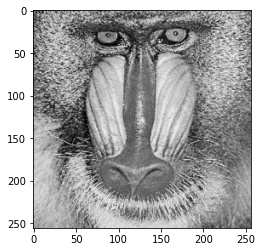

In [ ]:
mandrill=imread('Mandrill.png')
plt.imshow(mandrill,'gray')
mandrill.shape ##This will be helpful to cross verify the size of output image later on after getting the results 

###2. Function for Determining Kernel size
Given a value of $\sigma$ the function returns the value of the width (or size) of blur kernel.

In [ ]:
 
def get_kernel_size(sigma):
  width_kernel=int(np.ceil(6*sigma+1))
  if width_kernel % 2 ==0:                   #if width of kernal is even then make it to nearest odd integer
    width_kernel=width_kernel+1
  return width_kernel    

###3. Function for Formation of Blur Kernel
Given the value of $\sigma$ and the kernel width (or size) the function returns a gaussian blur kernel of size as specified by kernel width.

In [ ]:

def form_blur_kernel(width_kernel_2,sigma):
  if (width_kernel_2==1):
    blur_kernel=np.ones((width_kernel_2,width_kernel_2))
  else:
    half_width_kernel= width_kernel_2//2
    blur_kernel=np.zeros((width_kernel_2,width_kernel_2))
    for i in range(width_kernel_2):
      for j in range(width_kernel_2):
            #skipping the 1/(2*np.pi*sigma**2) constant as it will cancel out 
        blur_kernel[i, j] = np.exp((-(i-half_width_kernel)**2-(j-half_width_kernel)**2)/(2*(sigma**2)))
    blur_kernel = blur_kernel/np.sum(blur_kernel)
  return blur_kernel


###4. Function for Preparation of the image
Given the image (i.e. mandrill) and the kernel width (or size of blur kernel)  this function performs padding on the image (i.e. mandrill) so that the blur kernel sits properly on the image and after convolution the output image is of the same size as that of input image.

Padding can be done in two types:


*   Zero padding (filling the outer rows by zeros)
*   Extension (filling of the outer rows with pixels similar to the pixels in the image)

Here, we are using extension method for padding.



In [ ]:
 
def pad_the_image(image,width_kernel_1):
  half_width_kernel= width_kernel_1//2
  x,y=image.shape
  if (width_kernel_1!=1):  
    padded_image=np.zeros((x+2*half_width_kernel,y+2*half_width_kernel))
    padded_image[0:x,0:y]=image
    padded_image[2*half_width_kernel::,0:y]=image
    padded_image[0:x,2*half_width_kernel::]=image
    padded_image[2*half_width_kernel::,2*half_width_kernel::]=image
    padded_image[half_width_kernel:- half_width_kernel ,half_width_kernel:- half_width_kernel]=image
  else:
    padded_image=image

  return padded_image  

###5. Preform Convolution and Give output image
Given the padded image and the blur kernel, this function performs the convolution of the padded image and blur kernel and produces the output image.

In [ ]:

def convolve_image_and_kernel(padded_image,kernel):
  x,y=padded_image.shape
  width_kernel,width_kernel_1=kernel.shape
  half_width_kernel= width_kernel//2
  x,y=x-2*half_width_kernel,y-2*half_width_kernel
  convolved_image=np.zeros((x,y))

  for i in range (0,x):
    for j in range (0,y):
      section_padded_image=padded_image[0+i:width_kernel+i,0+j:width_kernel+j]
      convolved_image[i,j]=np.sum(section_padded_image*kernel)

  #plt.imshow(blurred_output_image,'gray')
  return convolved_image

###6. Storing and Generating the output images for Various $\sigma$ values
Here we are creating the $\sigma$ values array to iterate over and generate the output images which will be stored in a dictionary.

In [ ]:
output_images_dictionary = dict()
sigmas=np.array([1.6, 1.2, 1.0, 0.6, 0.3, 0.0])

The following code block iterates over the the various $\sigma$ values contained in the array and generates corresponding output images which we are storing in the dictionary.

In [ ]:
for t in range(len(sigmas)):
  sigma2 = sigmas[t]
  kernel_size = get_kernel_size(sigma2)
  blur_kernel = form_blur_kernel(kernel_size,sigma2)
#padding the image
  padded_image = pad_the_image(mandrill,kernel_size)
  output_image = convolve_image_and_kernel(padded_image,blur_kernel)
  if t<=len(sigmas):
    output_images_dictionary[t]=output_image
  else:
    break  

###7. Plotting the output images
The following code block plots all the output images for easy visualisation and comparison.

Text(0.5, 1.0, 'sigma = 0.0')

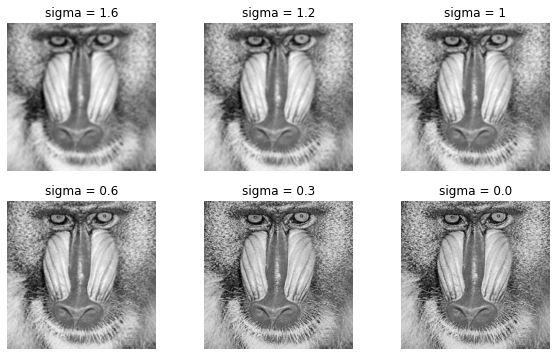

In [ ]:
# code for displaying multiple images in one figure

# create figure
fig = plt.figure(figsize=(10,6))

# setting values to rows and column variables
rows = 2
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(output_images_dictionary[0],'gray')
plt.axis('off')
plt.title("sigma = 1.6")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(output_images_dictionary[1],'gray')
plt.axis('off')
plt.title("sigma = 1.2")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(output_images_dictionary[2],'gray')
plt.axis('off')
plt.title("sigma = 1")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
# showing image
plt.imshow(output_images_dictionary[3],'gray')
plt.axis('off')
plt.title("sigma = 0.6")

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)
# showing image
plt.imshow(output_images_dictionary[4],'gray')
plt.axis('off')
plt.title("sigma = 0.3")

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)
# showing image
plt.imshow(output_images_dictionary[5],'gray')
plt.axis('off')
plt.title("sigma = 0.0")


In [ ]:
output_images_dictionary[2].shape ##This verifies that the output images are of same size as of the original image.

(256, 256)

#**Observations:**

By looking at the results obtained, the following observations can be made.
* Increase in $\sigma$ results in increase in blur.
* There is no blurring when sigma is 0.
* Since Gaussian kernal is symmetric, blur_kernal can or cannot be flipped for computation of convolution. It doesnot affect the result.
